In [16]:
import cv2
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

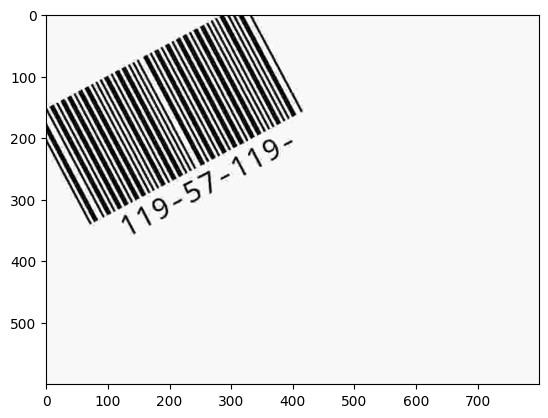

In [20]:
# Step 1: Load the image
image = cv2.imread('testcases/09 - e3del el soora ya3ammm.jpg')
plt.imshow(image)

In [24]:
import math
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Function to calculate the angle from the slope
def calculate_angle_from_slope(slope):
    if slope == float('inf'):  # Vertical line
        return 90  # 90 degrees for vertical lines
    # Calculate angle in radians and convert to degrees
    angle_rad = math.atan(slope)
    angle_deg = math.degrees(angle_rad)
    return angle_deg

# Function to calculate the slope of a line
def calculate_slope(x1, y1, x2, y2):
    if x2 - x1 != 0:
        return (y2 - y1) / (x2 - x1)  # Slope formula
    else:
        return float('inf')  # Infinite slope (vertical line)

# Convert the image to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Apply Canny edge detection
edges = cv2.Canny(gray, 50, 150)

# Use Hough Line Transform to detect lines
lines = cv2.HoughLinesP(edges, 1, np.pi / 180, threshold=100, minLineLength=50, maxLineGap=10)

# Loop through all detected lines and calculate slopes
if lines is not None:
    for line in lines:
        x1, y1, x2, y2 = line[0]
        slope = calculate_slope(x1, y1, x2, y2)
        break
# Calculate angle from the slope
angle = calculate_angle_from_slope(slope)
print(angle)

62.08969831667001


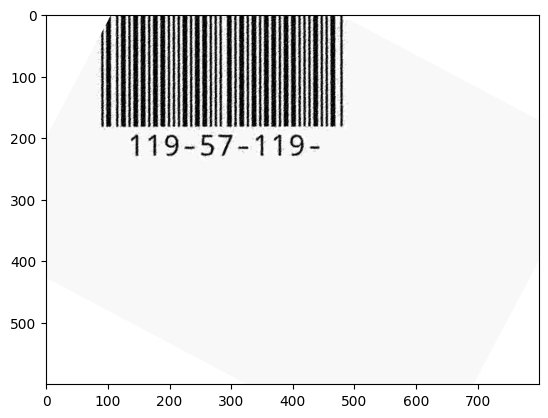

In [30]:
image = Image.open('testcases/09 - e3del el soora ya3ammm.jpg')
rotated_image = image.rotate(angle - 90, fillcolor='white')
plt.imshow(rotated_image)

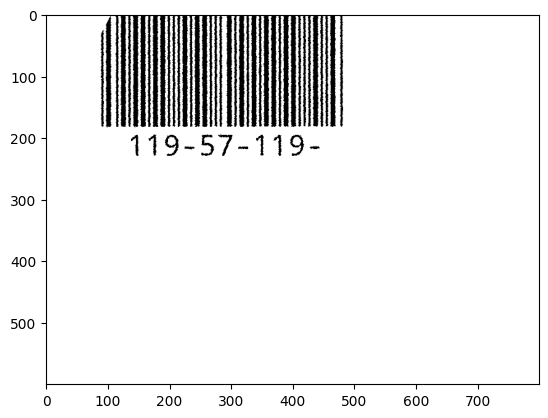

In [36]:
np_image = np.array(rotated_image)

_, binary_image = cv2.threshold(np_image, 127, 255, cv2.THRESH_BINARY)
plt.imshow(binary_image, cmap='gray')

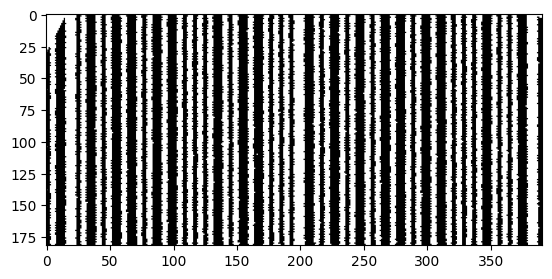

In [40]:
np_binary_image = np.array(binary_image)

def cropped_image(image):
  # Use Canny edge detection
    edges = cv2.Canny(image, 50, 150)
    # Detect vertical lines using Hough Line Transform
    lines = cv2.HoughLinesP(edges, 1, np.pi / 180, threshold=100, minLineLength=150, maxLineGap=10)
    min_x, max_x, min_y, max_y = float('inf'), -float('inf'), float('inf'), -float('inf')

    if lines is not None:
        for line in lines:
            x1, y1, x2, y2 = line[0]
            # Vertical lines: x1 == x2 or nearly vertical
            if abs(x1 - x2) < 10:
                min_x = min(min_x, x1, x2)
                max_x = max(max_x, x1, x2)
                min_y = min(min_y, y1, y2)
                max_y = max(max_y, y1, y2)
            elif abs(y1 - y2) < 10:  # Horizontal lines
                min_x = min(min_x, x1, x2)
                max_x = max(max_x, x1, x2)
                min_y = min(min_y, y1, y2)
                max_y = max(max_y, y1, y2)

    if min_x != float('inf') and max_x != -float('inf') and min_y != float('inf') and max_y != -float('inf'):
        return image[min_y:max_y, min_x:max_x]
cropped_image = cropped_image(np_binary_image)
plt.imshow(cropped_image)

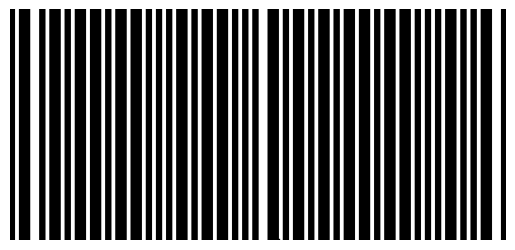

In [41]:
def apply_opening(image, kernel_size=(5, 5)):

    # Create a structuring element (kernel) for erosion and dilation
    kernel = np.ones(kernel_size, np.uint8)

    # Apply the opening operation: erosion followed by dilation
    opened_image = cv2.morphologyEx(image, cv2.MORPH_OPEN, kernel)

    return opened_image

kernel_size = (150, 1)
opened_image = apply_opening(cropped_image, kernel_size)

# Display the result
plt.imshow(opened_image, cmap='gray')
plt.axis('off')
plt.show()